<h2><a href="https://leetcode.com/problems/find-k-th-smallest-pair-distance">719. Find K-th Smallest Pair Distance</a></h2><h3>Hard</h3><hr><p>The <strong>distance of a pair</strong> of integers <code>a</code> and <code>b</code> is defined as the absolute difference between <code>a</code> and <code>b</code>.</p>

<p>Given an integer array <code>nums</code> and an integer <code>k</code>, return <em>the</em> <code>k<sup>th</sup></code> <em>smallest <strong>distance among all the pairs</strong></em> <code>nums[i]</code> <em>and</em> <code>nums[j]</code> <em>where</em> <code>0 &lt;= i &lt; j &lt; nums.length</code>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> nums = [1,3,1], k = 1
<strong>Output:</strong> 0
<strong>Explanation:</strong> Here are all the pairs:
(1,3) -&gt; 2
(1,1) -&gt; 0
(3,1) -&gt; 2
Then the 1<sup>st</sup> smallest distance pair is (1,1), and its distance is 0.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> nums = [1,1,1], k = 2
<strong>Output:</strong> 0
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> nums = [1,6,1], k = 3
<strong>Output:</strong> 5
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == nums.length</code></li>
	<li><code>2 &lt;= n &lt;= 10<sup>4</sup></code></li>
	<li><code>0 &lt;= nums[i] &lt;= 10<sup>6</sup></code></li>
	<li><code>1 &lt;= k &lt;= n * (n - 1) / 2</code></li>
</ul>


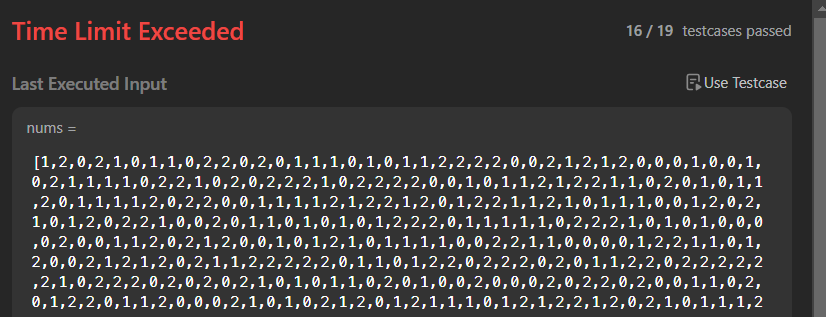

In [2]:
from typing import List
from heapq import heappush, heappop

class Solution:
    def smallestDistancePair(self, nums: List[int], k: int) -> int:

        maxheap = []

        for i in range(len(nums)):
            for j in range(i +1, len(nums)):
                diff = abs(nums[i] - nums[j])
                heappush(maxheap, (-diff, (i, j)))
                if len(maxheap) > k:
                    heappop(maxheap)

        return -maxheap[0][0]

## Using Binary Search 
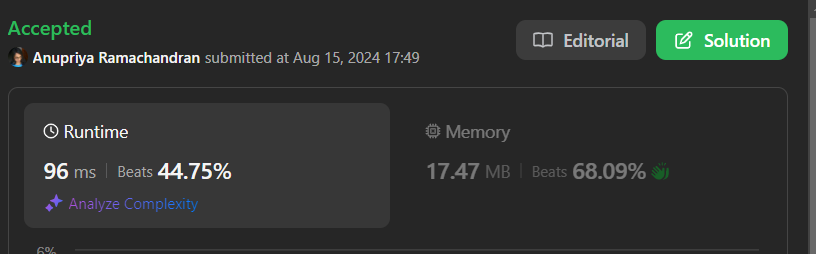

In [1]:
from typing import List

class Solution:
    def smallestDistancePair(self, nums: List[int], k: int) -> int:
        nums.sort()
        start, end = 0, max(nums) 

        while start < end :
            mid = start + (end - start)//2
            count = self.get_count(nums, mid)
            if count < k:
                start = mid + 1
            else:
                end = mid

        return start

    def get_count(self, nums, target_diff):
        j = 1
        count = 0
        for i in range(len(nums)):
            while j < len(nums) and abs(nums[i] - nums[j]) <= target_diff:
                j  += 1
            count += (j - 1 -i )
        return count

## **Solution Concept : Problem : Return Kth smallest difference**

<p> <strong> We are checking the count if all (i, j) who are having difference less than a given difference d and checking if paircounts equals k, then we can return that difference. </strong></p>

<p> <strong>  And for defining the difference d at each point, we are using binary search between 0 to max(nums), since difference will always lie between that for + numbers. </strong></p>